![Logo TUBAF](https://tu-freiberg.de/sites/default/files/media/freiberger-alumni-netzwerk-6127/wbm_orig_rgb_0.jpg)

Exercise material of the MSc-level course **Advanced Soil Mechanics**.
Held at Technische Universität Bergakademie Freiberg.

Comments to:

*Prof. Dr. Thomas Nagel  
Chair of Soil Mechanics and Foundation Engineering  
Geotechnical Institute  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/fakultaet3/gt/soilmechanics

# MCC implementation tests

In [178]:
#HIDDEN
import numpy as np
import matplotlib.pyplot as plt #plotting
import seaborn as sns
import os
import mtest
import tfel.math

In [179]:
import plot_settings
%run stress_path_defs.ipynb

In [180]:
%run plot_settings.py

In [181]:
#HIDDEN
build_release = 'mfront --obuild --interface=generic ModCamClay_semiExplParaInit.mfront'
#os.system(build_release)

In [182]:
#HIDDEN
build_release = 'mfront --obuild --interface=generic ModCamClayStandard.mfront'
#os.system(build_release)

In [183]:
build_release = 'mfront --obuild --interface=generic ModCamClay_semiExplParaInitNLnu.mfront'
#os.system(build_release)

In [184]:
nu = 0.25  # Poisson ratio
E = 50.0e6  # Young's modulus in Pa
la = 7.7e-2  # slope of the virgin consolidation line
ka = 6.6e-3  # slope of the swelling line
M = 1.2  # slope of the critical state line (CSL)
v0 = 1.788  # initial volume ratio
phi0 = 1 - 1 / v0  # Initial porosity
pc0 = 800.0e3  # Initial pre-consolidation pressure in Pa
pamb = 1.0  # Ambient pressure in Pa

times = np.linspace(0,1,1000)

In [185]:
#HIDDEN
#%run stress_path_defs.ipynb
#sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)
orig_OCR8 = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)

In [186]:
orig_OCR2 = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)

In [187]:
#%run stress_path_defs.ipynb
#build_release = 'mfront --obuild --interface=generic ModCamClay_semiExplParaInit.mfront'
#os.system(build_release)
OGS_OCR8 = MCC_triax_test_OGS(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)

In [188]:
OGS_OCR2 = MCC_triax_test_OGS(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)

In [189]:
OGS_NL_OCR8 = MCC_triax_test_OGS_NL(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)

In [190]:
OGS_NL_OCR2 = MCC_triax_test_OGS_NL(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)

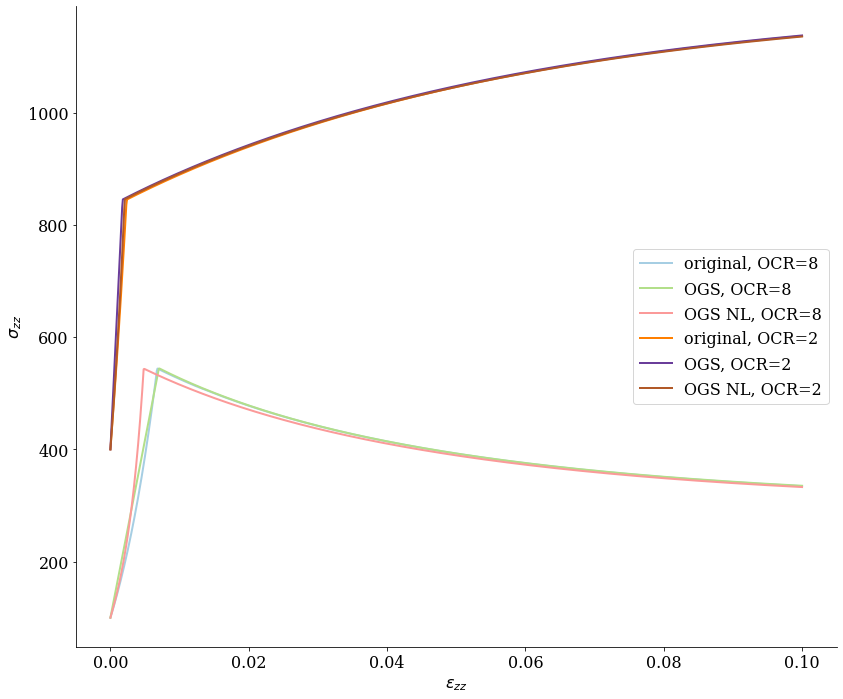

In [191]:
import matplotlib.cm as cm
# Get the paired colormap
cmap = cm.get_cmap('Paired')

# Get the list of colors from the colormap
colors = cmap(np.linspace(0, 1, 6))

fig, ax = plt.subplots(figsize=(12,10))

# Set the color of each line using the colors from the colormap
ax.plot(orig_OCR8[5], orig_OCR8[4]/1e3, label='original, OCR=8', color=colors[0])
ax.plot(OGS_OCR8[5], OGS_OCR8[4]/1e3, label='OGS, OCR=8', color=colors[1])
ax.plot(OGS_NL_OCR8[5], OGS_NL_OCR8[4]/1e3, label='OGS NL, OCR=8', color=colors[2])
ax.plot(orig_OCR2[5], orig_OCR2[4]/1e3, label='original, OCR=2', color=colors[3])
ax.plot(OGS_OCR2[5], OGS_OCR2[4]/1e3, label='OGS, OCR=2', color=colors[4])
ax.plot(OGS_NL_OCR2[5], OGS_NL_OCR2[4]/1e3, label='OGS NL, OCR=2', color=colors[5])
ax.legend()
ax.set_xlabel('$\\epsilon_{zz}$')
ax.set_ylabel('$\\sigma_{zz}$')
fig.tight_layout();

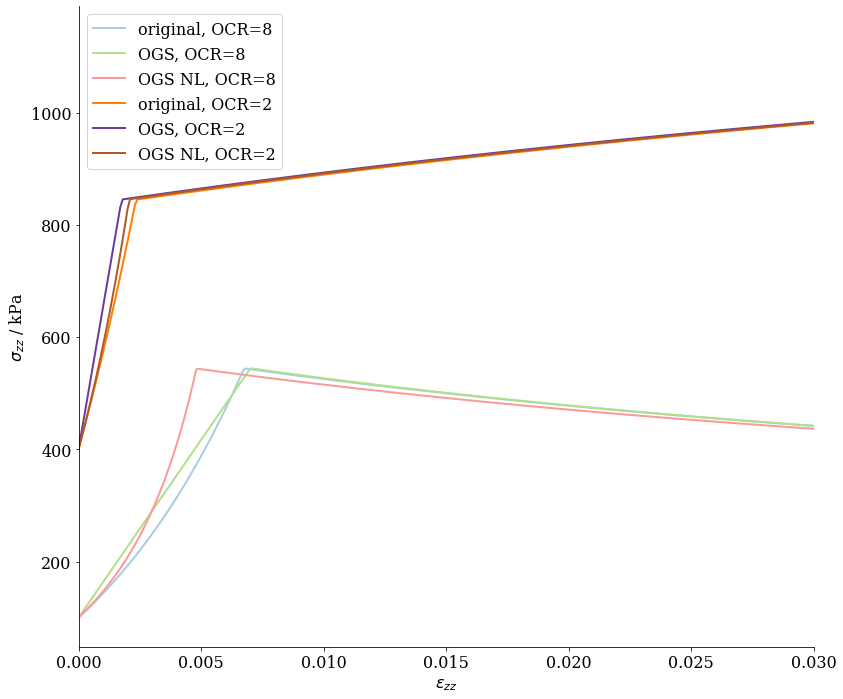

In [192]:
fig, ax = plt.subplots(figsize=(12,10))

# Set the color of each line using the colors from the colormap
ax.plot(orig_OCR8[5], orig_OCR8[4]/1e3, label='original, OCR=8', color=colors[0])
ax.plot(OGS_OCR8[5], OGS_OCR8[4]/1e3, label='OGS, OCR=8', color=colors[1])
ax.plot(OGS_NL_OCR8[5], OGS_NL_OCR8[4]/1e3, label='OGS NL, OCR=8', color=colors[2])
ax.plot(orig_OCR2[5], orig_OCR2[4]/1e3, label='original, OCR=2', color=colors[3])
ax.plot(OGS_OCR2[5], OGS_OCR2[4]/1e3, label='OGS, OCR=2', color=colors[4])
ax.plot(OGS_NL_OCR2[5], OGS_NL_OCR2[4]/1e3, label='OGS NL, OCR=2', color=colors[5])
ax.legend()
ax.set_xlabel('$\\epsilon_{zz}$')
ax.set_ylabel('$\\sigma_{zz}$ / kPa')
ax.set_xlim(0,0.03)
fig.tight_layout();

We do see differences in the elastic part of the stress-strain curve. Yield stress and plastic flow are captured well by all models. Let's look at the volumetric behaviour:

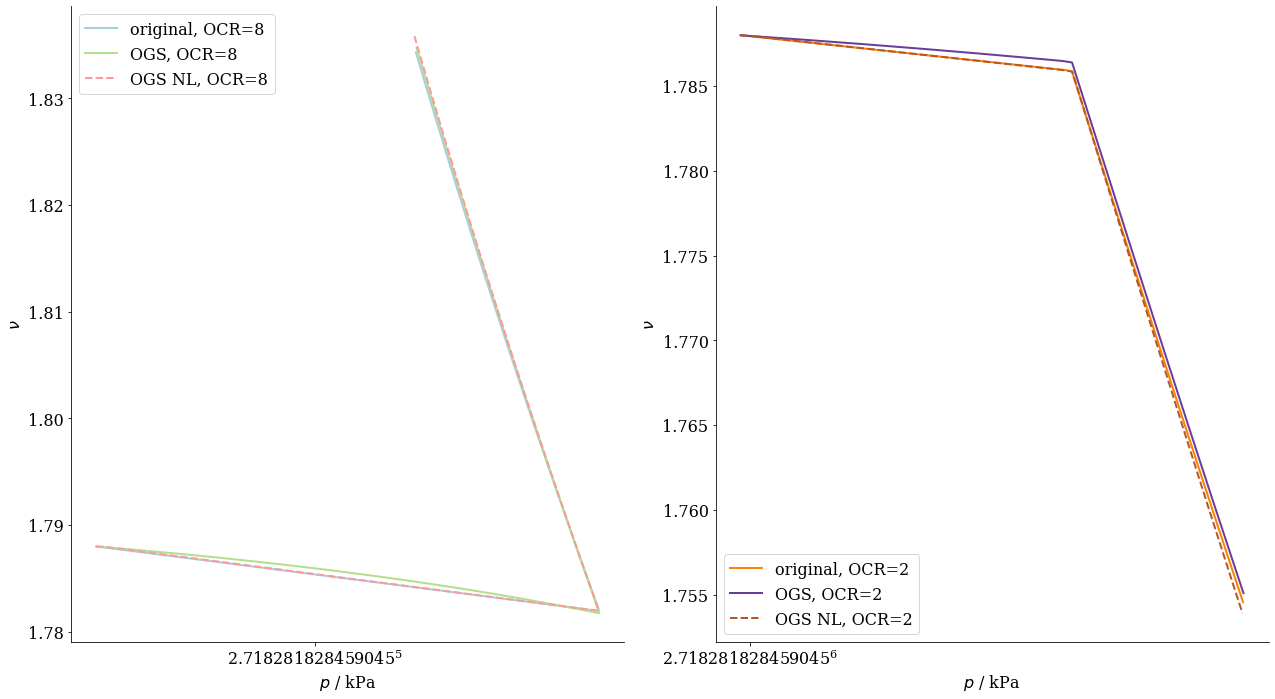

In [196]:
fig, ax = plt.subplots(figsize=(18,10),ncols=2)

# Set the color of each line using the colors from the colormap

ax[0].plot((orig_OCR8[0]+orig_OCR8[2]+orig_OCR8[4])/3e3, orig_OCR8[13], label='original, OCR=8', color=colors[0])
ax[0].plot((OGS_OCR8[0]+OGS_OCR8[2]+OGS_OCR8[4])/3e3, OGS_OCR8[13], label='OGS, OCR=8', color=colors[1])
ax[0].plot((OGS_NL_OCR8[0]+OGS_NL_OCR8[2]+OGS_NL_OCR8[4])/3e3, OGS_NL_OCR8[13], label='OGS NL, OCR=8', color=colors[2],ls='--')

ax[1].plot((orig_OCR2[0]+orig_OCR2[2]+orig_OCR2[4])/3e3, orig_OCR2[13], label='original, OCR=2', color=colors[3])
ax[1].plot((OGS_OCR2[0]+OGS_OCR2[2]+OGS_OCR2[4])/3e3, OGS_OCR2[13], label='OGS, OCR=2', color=colors[4])
ax[1].plot((OGS_NL_OCR2[0]+OGS_NL_OCR2[2]+OGS_NL_OCR2[4])/3e3, OGS_NL_OCR2[13], label='OGS NL, OCR=2', color=colors[5],ls='--')
for i in range(2):
    ax[i].legend()
    ax[i].set_xlabel('$p$ / kPa')
    ax[i].set_ylabel('$\\nu$')
    ax[i].set_xscale('log',base=np.e)
fig.tight_layout();

All non-linear models produce the desired $\lambda$, $\kappa$ behaviour. OGS NL and the classic model behave identically. So I think the above difference stems from the treatment of shear (in OGS NL it is absolute, instead of incremental, which could explain the stiffening). To compare with the analytical result, let's perform an **isotropic compression test**.

In [205]:
OGS_NL_iso = MCC_iso_test_OGS_NL(E,nu,la,ka,M,v0,phi0,pc0,pamb,pc0/4,2*pc0,times)
%run stress_path_defs.ipynb
orig_iso = MCC_iso_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,pc0/4,2*pc0,times)

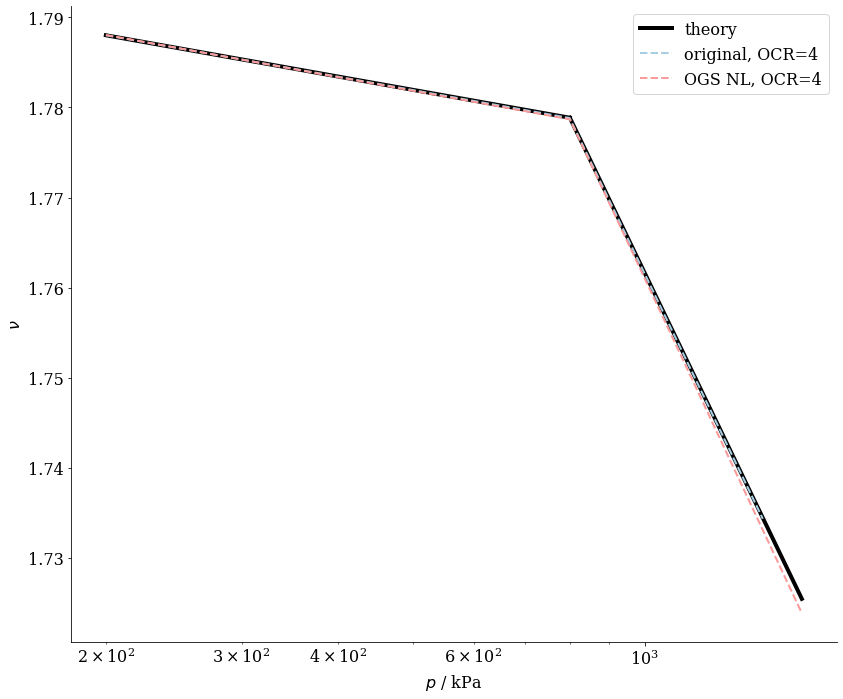

In [209]:
fig, ax = plt.subplots(figsize=(12,10))

ax.plot([pc0/1e3,2*pc0/1e3],
           [1/(1-phi0)-ka*np.log(pc0/(pc0/4)),1/(1-phi0)-ka*np.log(pc0/(pc0/4))-la*np.log(2*pc0/pc0)],
           color='black',lw=4,label='theory')
ax.plot([pc0/4e3,pc0/1e3],
           [1/(1-phi0),1/(1-phi0)-ka*np.log(pc0/(pc0/4))],
           color='black',lw=4)
ax.plot((orig_iso[0]+orig_iso[2]+orig_iso[4])/3e3, orig_iso[13], label='original, OCR=4', color=colors[0],ls='--')
ax.plot((OGS_NL_iso[0]+OGS_NL_iso[2]+OGS_NL_iso[4])/3e3, OGS_NL_iso[13], label='OGS NL, OCR=4', color=colors[2],ls='--')
ax.legend()
ax.set_xlabel('$p$ / kPa')
ax.set_ylabel('$\\nu$')
ax.set_xscale('log')#,base=np.e)
fig.tight_layout();

Here we see that the original formulation coincides better with the expected result during hardening. However, the original code did not converge in stress-control, whereas the OGS NL code did. For the original code, I had to switch to a strain-controlled test.

## Suggested steps

* simplified treatment of elastic constant update and stress computation as in original MCC implementation -- shortens the code, no special functions
* algorithmic structure (additional convergence steps, non-dimensional residual formulation, analytical Jacobian, tight tolerances) from OGS (NL) implementation
* demonstrate convergence and repeat the above steps with coarse time resolution
* reduced output set of internal variables compared to current OGS versions (less redundancy -- only one volumetric measure)
* integration into source code as combined author list (ES, CS, MM, TH, TN)

In [195]:
#HIDDEN
s1, s2, s3 = sp.symbols('sigma_1 sigma_2 sigma_3')

NameError: name 'sp' is not defined

In [ ]:
sig = sp.Matrix([[s1,0,0],[0,s2,0],[0,0,s3]])
display("sigma_{ij}", sig)

In [ ]:
sigD = sig - sp.Rational('1/3')*sp.trace(sig) * sp.eye(3)
display("sigma^D_{ij}", sigD)

In [ ]:
q = sp.sqrt(sp.Rational('3/2') * sp.tensorcontraction(sigD*sigD,(0,1)))
display("q", q.simplify())

Thus, by applying the second binomial equation we arrive at

$$
    q = \frac{1}{\sqrt{2}} \sqrt{(\sigma_1 - \sigma_2)^2 + (\sigma_1 - \sigma_3)^2 + (\sigma_2 - \sigma_3)^2}
$$

Now let's take a look at standard triaxial tests, where $\sigma_1 \geq \sigma_2 = \sigma_3$ for triaxial compression and $\sigma_1 = \sigma_2 \geq \sigma_3$ for triaxial extension.

Therefore,

$$
    p_\text{triax} =  \begin{cases}
        \displaystyle \frac{\sigma_1 + 2 \sigma_3}{3} & \text{triax. comp.}
        \\\\
        \displaystyle \frac{2 \sigma_1 + \sigma_3}{3} & \text{triax. ext.}
    \end{cases}
$$

In [ ]:
q_comp = q.subs(s2,s3)
display(sp.simplify(q_comp))

In [ ]:
q_ext = q.subs(s2,s1)
display(sp.simplify(q_ext))

Thus, using the sign convention introduced above, the deviatoric invariant $q$ is identical and equal to

$$
    q_\text{triax} = \sigma_1 - \sigma_3
$$

We now formulate the Mohr-Coulomb criterion in terms of the invariants $p$ and $q$ in the case of triaxial compression or extension.

$$
    q = (\sigma_1 + \sigma_3) \sin \varphi + 2c \cos \varphi
$$

### Compression:

Using $3p = \sigma_1 + 2\sigma_3$ as well as $3p - q = 3\sigma_3$ we find

\begin{align}
    q &= (3 p - \sigma_3) \sin \varphi + 2c \cos \varphi
    \\
    3q &= (6 p + q) \sin \varphi + 6c \cos \varphi
    \\
    q &= 6 \frac{p \sin \varphi + c \cos \varphi}{3 - \sin \varphi}
\end{align}

### Extension:

Using $3p = 2\sigma_1 + \sigma_3$ as well as $3p + q = 3\sigma_1$ we find

\begin{align}
    q &= (3 p - \sigma_1) \sin \varphi + 2c \cos \varphi
    \\
    3q &= (6 p - q) \sin \varphi + 6c \cos \varphi
    \\
    q &= 6 \frac{p \sin \varphi + c \cos \varphi}{3 + \sin \varphi}
\end{align}

In order to draw the results we define $q_\text{triax} = \sigma_\text{ax,f} - p_\text{conf}$, so that $q_\text{triax} = \pm q$ for compression and extension, respectively.

In [ ]:
#HIDDEN
pconf = np.linspace(0,500,10)
q_triax_comp = lambda phi, c, pc: 6 * (pc * np.sin(phi) + c * np.cos(phi))/(3-np.sin(phi))
q_triax_ext = lambda phi, c, pc: - 6 * (pc * np.sin(phi) + c * np.cos(phi))/(3+np.sin(phi))
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(pconf,q_triax_comp(np.deg2rad(30),50,pconf),label='triaxial compression')
ax.plot(pconf,q_triax_ext(np.deg2rad(30),50,pconf),label='triaxial extension')
ax.set_xlim(left=0)
ax.set_ylabel('$(\sigma_\\mathrm{ax,f} - p_\\mathrm{conf})$ / kPa')
ax.set_xlabel('$p_\\mathrm{conf}$ / kPa')
ax.spines['bottom'].set_position(('data', 0))
ax.legend()
fig.tight_layout()

Thus, we find an alternative formulation of the Mohr-Coulomb yield function $f$ in the $p-q$ space (only allowing triaxial compression or extension configurations):

$$
      f_\text{comp/ext} = q - \frac{6 \sin \varphi}{3 \mp \sin \varphi} p + \frac{6 c \cos \varphi}{3 \mp \sin \varphi} \leq 0
$$

**Remark:** In general stress states, the Mohr-Coulomb model needs to be formulated in $p-q-\theta_c$ space, where the Lode angle $\theta_c$

\begin{align}
    \theta_c &= \frac{1}{3}\arccos \left[ \frac{J_3}{2} \left( \frac{3}{J_2} \right)^{\frac{3}{2}} \right] \quad \text{with} \quad J_2 = \frac{q^2}{3},\ J_3 = \det \sigma_{ij}^\text{D}
    \\
    &= \frac{1}{3}\arccos \left[ \frac{27}{2} \left( \frac{J_3}{q^3} \right) \right]
\end{align}

distinguishes different loading configurations in terms of triaxiality (the position of the stress state in the deviatoric plane). For the investigated cases we find:

In [ ]:
J3 = sp.det(sigD)
display(sp.simplify(J3.subs(s2,s3)/q_comp**3*27/2).factor())
display(sp.simplify(J3.subs(s2,s1)/q_ext**3*27/2).factor())

The arguments are $\pm 1$ for compression and extension, respectively. Thus, 

$$
    \theta_c = \begin{cases}
        0 & \text{triax. compr.}
        \\\\
        \pi / 3 & \text{triax. ext.}
    \end{cases}
$$

**Note:** The definition of the Lode angle is not unique. Neither are it's limits.

### Flow rule

The Mohr-Coulomb model is usually employed with a non-associated flow rule based on a plastic potential involving the angle $\psi$ controlling dilatancy (the associated case would follow from $\varphi = \psi$). Let's depart again from a formulation written in axial and confining stresses:

$$
    g = \sigma_\text{ax} - \begin{cases}
        \displaystyle \frac{1 + \sin \psi}{1 - \sin \psi} p_\text{conf} & \text{triax. compr.}
        \\\\
        \displaystyle \frac{1 - \sin \psi}{1 + \sin \psi} p_\text{conf} & \text{triax. ext.}
    \end{cases}
$$

Plastic flow in the axial and "radial" directions follows from

\begin{align}
    \dot\epsilon_\text{ax}^\text{pl} &= \dot{\lambda} \frac{\partial g}{\partial \sigma_\text{ax}} = \dot\lambda
    \\
    \dot\epsilon_\text{rad}^\text{pl} &= \dot{\lambda} \frac{\partial g}{\partial p_\text{conf}} = -\dot\lambda \displaystyle \frac{1 \pm \sin \psi}{1 \mp \sin \psi}
\end{align}

The material flows into the direction of the axial stress change (compression or extension) and to a varying degree against the confining pressure (dilatancy effect).

The angle between radial and axial flow is thus

$$
    \frac{\dot\epsilon_\text{rad}^\text{pl}}{\dot\epsilon_\text{ax}^\text{pl}} = - \frac{1 \pm \sin \psi}{1 \mp \sin \psi} = \tan^2\left( \frac{\pi}{4} \pm \frac{\psi}{2} \right)
$$

We recognize the similarity to the results obtained for the active and passive slip planes (where we had studied the associated case).

We can look at the same concept using a $p-q$ formulation:

$$
    g_\text{comp/ext} = q - \frac{6 \sin \psi}{3 \mp \sin \psi} p
$$

The material will flow deviatorically and volumetrically:

\begin{align}
    \dot\epsilon_\text{dev}^\text{pl} &= \dot \lambda \frac{\partial g}{\partial q} = \dot \lambda
    \\
    \dot\epsilon_\text{vol}^\text{pl} &= \dot \lambda \frac{\partial g}{\partial p} = -\dot \lambda \frac{6 \sin \psi}{3 \mp \sin \psi}
\end{align}

Thus, for $\psi = 0°$ there will be no volume change (only isochoric plastic deformations). For a given dilatancy angle, the plastic volume strain rate depends on the loading configuration (Lode angle).

### Triaxial tests

We start by simulating triaxial compression and extension tests.

In [ ]:
c = 50e3
phi = 30
psi = 10
E = 50e6
nu = 0.25
times = np.append(np.linspace(0,1,10),np.linspace(1.01,2,19))

In [ ]:
#HIDDEN
#%run stress_path_defs.ipynb
sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz = set_up_triax_test(E,nu,c,phi,psi,400e3,5e-2,times)
plot_results(sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, 'triaxial compression')

In [ ]:
#HIDDEN
#%run stress_path_defs.ipynb
sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz = set_up_triax_test_ext(E,nu,c,phi,psi,800e3,times)
plot_results(sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, 'triaxial extension')

### Shear box

We now simulate a shear box test using different assumptions regarding lateral confinement. Note, that due to differential normal stresses this is not a simple shear test (see lecture notes from "Mechanical Properties of Loose Rocks / Granular Media").

In [ ]:
sig_ax = -100.e3

In [ ]:
#HIDDEN
sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz = set_up_shear_test(E,nu,c,phi,psi,sig_ax,False,times)
plot_results(sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, 'shear test under normal load and lateral confining stress')

In [ ]:
#HIDDEN
sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz = set_up_shear_test(E,nu,c,phi,psi,sig_ax,True,times)
plot_results(sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, 'shear test under normal load and lateral rigid confinement')

In [ ]:
#HIDDEN
q = lambda p, pc, M: np.sqrt(M*M * (p * (pc - p)))
CSL = lambda p,M: M*p

fig, ax = plt.subplots(figsize=(12,8))
p = np.linspace(0,300,1000)
ax.plot(p,q(p,300,1.0),label='$p_c = 300$ kPa, $M = 1.0$')
ax.plot(p,q(p,300,0.8),label='$p_c = 300$ kPa, $M = 0.8$')
p = np.linspace(0,700,1000)
ax.plot(p,q(p,700,0.8),label='$p_c = 700$ kPa, $M = 0.8$')
p = np.linspace(0,500,1000)
ax.plot(p,CSL(p,1.0),color='black',ls='--',label='$M = 1$')
ax.plot(p,CSL(p,0.8),color='black',ls=':',label='$M = 0.8$')
ax.legend()
ax.set_xlabel('$p$ / kPa')
ax.set_ylabel('$q$ / kPa')
fig.tight_layout();

Let's look at plastic flow for a fixed pre-consolidation pressure (the non-standard units here are one reason we modified the formulation).

\begin{align}
    \dot\epsilon_\text{dev}^\text{pl} &= \dot \lambda \frac{\partial g}{\partial q} = 2 \dot \lambda q
    \\
    \dot\epsilon_\text{vol}^\text{pl} &= \dot \lambda \frac{\partial g}{\partial p} = -\dot \lambda M^2 (p_c - 2 p)
\end{align}

We observe that the plastic volume strain vanishes for $p = p_c/2$ and flow becomes purely deviatoric, which is one determinant of the critical state. We also observe, that for pressures $p < p_c/2$ flow is dilatant and for $p > p_c/2$ flow is contractant. For $p = p_c$ we have isotropic consolidation, i.e. no deviatoric flow but plastic compaction.

Another important ingredient is the hardening/softening rule:

$$
    \dot{p}_c = p_c \frac{1+e}{\lambda - \kappa} \dot{\epsilon}_\text{vol}^\text{pl}
$$

With $p_c \geq 0$, $\lambda - \kappa \geq 0$ we find that contractant flow leads to hardening (an expansion of the yield surface) and dilatant flow to softening (contraction of the yield surface). Note again, that the sign conventions regarding stresses and strains vary from publication to publication. More details can be found in Schmidt et al. 2017 (see lecture notes).

In [ ]:
nu = 0.25  # Poisson ratio
E = 50.0e6  # Young's modulus in Pa
la = 7.7e-2  # slope of the virgin consolidation line
ka = 6.6e-3  # slope of the swelling line
M = 1.2  # slope of the critical state line (CSL)
v0 = 1.788  # initial volume ratio
phi0 = 1 - 1 / v0  # Initial porosity
pc0 = 800.0e3  # Initial pre-consolidation pressure in Pa
pamb = 1.0  # Ambient pressure in Pa

times = np.linspace(0,1,15)

In [ ]:
#HIDDEN
%run stress_path_defs.ipynb
sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,100e3,10e-2,times)
plot_results_MCC(sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc,M, 'Triaxial compression, consolidated to OCR=8')

In [ ]:
#HIDDEN
%run stress_path_defs.ipynb
times = np.linspace(0,1,10)
sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc = MCC_triax_test(E,nu,la,ka,M,v0,phi0,pc0,pamb,400e3,10e-2,times)
plot_results_MCC(sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc, M, 'Triaxial compression, consolidated to OCR=2')

In [ ]:
#HIDDEN
%run stress_path_defs.ipynb
sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc = MCC_triax_test_ext(E,nu,la,ka,M,v0,phi0,pc0,pamb,800e3,times)
plot_results_MCC(sig_xx, eps_xx, sig_yy, eps_yy, sig_zz, eps_zz, tau_xy, eps_xy, tau_xz, eps_xz, tau_yz, eps_yz, pc, M, 'Triaxial extension, consolidated to OCR=1')